# Preliminary EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## Importing subset of COVID-19 case data

In [2]:
!head -5 ./../data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv

case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
2020-08,KY,21,GRAYSON,21085,0 - 17 years,NA,NA,NA,,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,
2021-01,NC,37,MARTIN,37117,0 - 17 years,NA,NA,NA,0,,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,
2021-03,VT,50,FRANKLIN,50011,18 to 49 years,NA,NA,NA,0,0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
2020-09,GA,13,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,,,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,


In [3]:
df_cases = pd.read_csv(
    './../data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv',
    nrows=280_000)

In [4]:
df_cases

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-08,KY,21,GRAYSON,21085.0,0 - 17 years,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
1,2021-01,NC,37,MARTIN,37117.0,0 - 17 years,NaN,NaN,NaN,0.0,NaN,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,NaN
2,2021-03,VT,50,FRANKLIN,50011.0,18 to 49 years,NaN,NaN,NaN,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
3,2020-09,GA,13,CATOOSA,13047.0,0 - 17 years,Female,Unknown,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2021-04,PA,42,CLINTON,42035.0,0 - 17 years,Female,NaN,NaN,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,2020-03,MD,24,ST. MARY'S,24037.0,18 to 49 years,Male,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,NaN,NaN
279996,2021-01,NY,36,TOMPKINS,36109.0,18 to 49 years,Male,Unknown,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
279997,2020-11,MD,24,HOWARD,24027.0,50 to 64 years,Male,Missing,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
279998,2020-11,OK,40,JACKSON,40065.0,50 to 64 years,Male,Unknown,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,NaN,NaN


In [5]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   case_month                       280000 non-null  object 
 1   res_state                        280000 non-null  object 
 2   state_fips_code                  280000 non-null  int64  
 3   res_county                       279632 non-null  object 
 4   county_fips_code                 279632 non-null  float64
 5   age_group                        266345 non-null  object 
 6   sex                              234995 non-null  object 
 7   race                             159465 non-null  object 
 8   ethnicity                        136530 non-null  object 
 9   case_positive_specimen_interval  78363 non-null   float64
 10  case_onset_interval              139269 non-null  float64
 11  process                          280000 non-null  object 
 12  ex

In [6]:
df_cases.columns

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [7]:
data_types = {'case_month': 'string', 'res_state': 'string', 
    'state_fips_code': 'string', 'res_county': 'string', 
    'county_fips_code': 'string', 'age_group': 'string', 'sex': 'string', 
    'race': 'string', 'ethnicity': 'Int16', 
    'case_positive_specimen_interval': 'Int16', 
    'case_onset_interval': 'string', 'process': 'string', 
    'exposure_yn': 'string', 'current_status': 'string', 
    'symptom_status': 'string', 'hosp_yn': 'string', 'icu_yn': 'string', 
    'death_yn': 'string', 'underlying_conditions_yn': 'string',}

In [8]:
df_cases = pd.read_csv(
    './../data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv',
    dtype='string',
    nrows=280_000)

In [9]:
df_cases = df_cases.drop(columns=['state_fips_code'])

In [10]:
df_cases['case_positive_specimen_interval'] = pd.to_numeric(
    df_cases['case_positive_specimen_interval'])
df_cases['case_onset_interval'] = pd.to_numeric(
    df_cases['case_onset_interval'])

In [11]:
df_cases

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-08,KY,GRAYSON,21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>
1,2021-01,NC,MARTIN,37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>
2,2021-03,VT,FRANKLIN,50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
3,2020-09,GA,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
4,2021-04,PA,CLINTON,42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,2020-03,MD,ST. MARY'S,24037,18 to 49 years,Male,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,<NA>,<NA>
279996,2021-01,NY,TOMPKINS,36109,18 to 49 years,Male,Unknown,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>
279997,2020-11,MD,HOWARD,24027,50 to 64 years,Male,Missing,<NA>,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
279998,2020-11,OK,JACKSON,40065,50 to 64 years,Male,Unknown,<NA>,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,<NA>,<NA>


In [12]:
df_cases.describe()

,case_positive_specimen_interval,case_onset_interval
count,78363.000000,139269.000000
mean,0.288580,0.124313
std,2.034302,1.808232
min,-52.000000,-24.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,53.000000,57.000000


In [13]:
22414/280000

0.08005

Only 8% of records report yes or no for underlying conditions. The rest are missing.

In [14]:
reported_states = sorted(df_cases['res_state'].unique())
reported_states[:4]

['AK', 'AL', 'AR', 'AZ']

In [15]:
all_states = ['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'VI', 'WA', 'WV', 'WI', 'WY']

In [16]:
for state in all_states:
    if state not in reported_states:
        print(state)

AS
DC
GU
MP
PR
VI
WY


Wyoming is not showing up in the subset of data. Does this extend to the full dataset?

In [17]:
df_cases

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-08,KY,GRAYSON,21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>
1,2021-01,NC,MARTIN,37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,Missing,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>
2,2021-03,VT,FRANKLIN,50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
3,2020-09,GA,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
4,2021-04,PA,CLINTON,42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,2020-03,MD,ST. MARY'S,24037,18 to 49 years,Male,<NA>,<NA>,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,<NA>,<NA>
279996,2021-01,NY,TOMPKINS,36109,18 to 49 years,Male,Unknown,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>
279997,2020-11,MD,HOWARD,24027,50 to 64 years,Male,Missing,<NA>,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
279998,2020-11,OK,JACKSON,40065,50 to 64 years,Male,Unknown,<NA>,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,<NA>,<NA>


In [34]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   case_month                       280000 non-null  string 
 1   res_state                        280000 non-null  string 
 2   res_county                       279632 non-null  string 
 3   county_fips_code                 279632 non-null  string 
 4   age_group                        266345 non-null  string 
 5   sex                              234995 non-null  string 
 6   race                             159465 non-null  string 
 7   ethnicity                        136530 non-null  string 
 8   case_positive_specimen_interval  78363 non-null   float64
 9   case_onset_interval              139269 non-null  float64
 10  process                          280000 non-null  string 
 11  exposure_yn                      280000 non-null  string 
 12  cu

Cases missing county information

In [36]:
df_cases[df_cases['res_county'].isna()]

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
259,2020-11,AZ,<NA>,<NA>,18 to 49 years,Female,Missing,Hispanic/Latino,NaN,NaN,Missing,Missing,Probable Case,Missing,Yes,Missing,<NA>,<NA>
673,2020-04,GA,<NA>,<NA>,65+ years,Female,Black,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,Missing,<NA>
1781,2020-11,AZ,<NA>,<NA>,18 to 49 years,Female,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,<NA>,<NA>
2294,2020-10,IL,<NA>,<NA>,18 to 49 years,Male,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
3316,2020-11,AZ,<NA>,<NA>,18 to 49 years,Female,Missing,Hispanic/Latino,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276713,2020-12,AZ,<NA>,<NA>,50 to 64 years,Female,White,<NA>,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,<NA>
277332,2020-11,GA,<NA>,<NA>,18 to 49 years,Male,Black,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>
278244,2020-12,AZ,<NA>,<NA>,50 to 64 years,Female,White,<NA>,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,<NA>
279431,2021-01,IL,<NA>,<NA>,18 to 49 years,Female,Missing,Missing,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>


## Importing community crosswalk by census track

In [18]:
df_counties = pd.read_csv(
    './../data/COVID-19_Community_Vulnerability_Crosswalk_-_Crosswalk_by_Census_Tract.csv')

In [19]:
df_counties.head(2)

,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,County FIPS,LOCATION,Total Score,Max Possible Score,Hardest Hit Area (HHA),HHA Score,Low Income Area (LIA) County SAIPE - (Poverty Percentage),Low Income Area (LIA) County SAIPE- Score,Low Income Area (LIA) Census Tract (Poverty Percentage),Low Income Area (LIA) Census Tract - Score,Tribal Community\n(1 if yes),Tribal Community\nScore (Geographic Only),Rural,Rural - Score
0,ALABAMA,AL,1001,Autauga,1001020100,1001,"Census Tract 201, Autauga County, Alabama",7,7,ModerateBurdenResolving,0,0.121,0,0.1666,7,Non-Tribal,0,0,0
1,ALABAMA,AL,1001,Autauga,1001020200,1001,"Census Tract 202, Autauga County, Alabama",7,7,ModerateBurdenResolving,0,0.121,0,0.1913,7,Non-Tribal,0,0,0


In [20]:
df_counties.columns

Index(['STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'County FIPS',
       'LOCATION', 'Total Score', 'Max Possible Score',
       'Hardest Hit Area (HHA)', 'HHA Score',
       'Low Income Area (LIA) County SAIPE - (Poverty Percentage)',
       'Low Income Area (LIA) County SAIPE- Score',
       'Low Income Area (LIA) Census Tract (Poverty Percentage)',
       'Low Income Area (LIA) Census Tract - Score',
       'Tribal Community\n(1 if yes)',
       'Tribal Community\nScore (Geographic Only)', 'Rural', 'Rural - Score'],
      dtype='object')

In [21]:
use_columns = ['STATE', 'COUNTY', 'County FIPS', 'Low Income Area (LIA) County SAIPE- Score', 'Tribal Community\n(1 if yes)', 'Rural']

In [22]:
column_names = ['state', 'county', 'county_fips', 'low_income_score', 'tribal', 'rural']

In [23]:
df_counties = pd.read_csv(
    './../data/COVID-19_Community_Vulnerability_Crosswalk_-_Crosswalk_by_Census_Tract.csv',
    usecols=use_columns,
    dtype='string')

In [24]:
df_counties.columns = column_names

In [25]:
df_counties = df_counties.astype({'low_income_score': 'int64', 'rural': 'int64'})

In [26]:
df_counties

,state,county,county_fips,low_income_score,tribal,rural
0,ALABAMA,Autauga,01001,0,Non-Tribal,0
1,ALABAMA,Autauga,01001,0,Non-Tribal,0
2,ALABAMA,Autauga,01001,0,Non-Tribal,0
3,ALABAMA,Autauga,01001,0,Non-Tribal,0
4,ALABAMA,Autauga,01001,0,Non-Tribal,0
...,...,...,...,...,...,...
72831,WYOMING,Washakie,56043,0,Non-Tribal,1
72832,WYOMING,Washakie,56043,0,Non-Tribal,1
72833,WYOMING,Washakie,56043,0,Non-Tribal,1
72834,WYOMING,Weston,56045,0,Non-Tribal,1


In [27]:
df_counties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72836 entries, 0 to 72835
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             72836 non-null  string
 1   county            72836 non-null  string
 2   county_fips       72836 non-null  string
 3   low_income_score  72836 non-null  int64 
 4   tribal            72836 non-null  string
 5   rural             72836 non-null  int64 
dtypes: int64(2), string(4)
memory usage: 3.3 MB


In [28]:
df_counties['tribal'] = np.where(df_counties['tribal'] == 'Non-Tribal', 0, 1)
df_counties['ctract_count'] = 1

In [29]:
df_counties

,state,county,county_fips,low_income_score,tribal,rural,ctract_count
0,ALABAMA,Autauga,01001,0,0,0,1
1,ALABAMA,Autauga,01001,0,0,0,1
2,ALABAMA,Autauga,01001,0,0,0,1
3,ALABAMA,Autauga,01001,0,0,0,1
4,ALABAMA,Autauga,01001,0,0,0,1
...,...,...,...,...,...,...,...
72831,WYOMING,Washakie,56043,0,0,1,1
72832,WYOMING,Washakie,56043,0,0,1,1
72833,WYOMING,Washakie,56043,0,0,1,1
72834,WYOMING,Weston,56045,0,0,1,1


In [30]:
df_counties = df_counties.groupby(['state', 'county', 'county_fips']).agg(
    {'low_income_score': 'mean', 'tribal': 'sum', 'rural': 'sum', 'ctract_count': 'sum'}).reset_index()

In [31]:
df_counties['perc_tribal_ct'] = df_counties['tribal'] / df_counties['ctract_count']
df_counties['perc_rural_ct'] = df_counties['rural'] / df_counties['ctract_count']

In [32]:
# df_counties = df_counties.drop(columns=['tribal', 'rural', 'ctract_count'])
df_counties = df_counties.drop(columns=['state', 'county', 'tribal', 'rural', 'ctract_count'])

In [33]:
df_counties

,county_fips,low_income_score,perc_tribal_ct,perc_rural_ct
0,01001,0,0.0,0.250000
1,01003,0,0.0,0.290323
2,01005,15,0.0,1.000000
3,01007,15,0.0,1.000000
4,01009,7,0.0,0.888889
...,...,...,...,...
3136,56037,0,0.0,0.250000
3137,56039,0,0.0,1.000000
3138,56041,0,0.0,1.000000
3139,56043,0,0.0,1.000000


## Joining datasets

In [39]:
df = df_cases.merge(
    df_counties, how='left', left_on='county_fips_code', right_on='county_fips')

In [41]:
df = df.drop(columns=['county_fips'])

In [42]:
df

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,low_income_score,perc_tribal_ct,perc_rural_ct
0,2020-08,KY,GRAYSON,21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,15.0,0.000000,1.000000
1,2021-01,NC,MARTIN,37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,15.0,0.000000,1.000000
2,2021-03,VT,FRANKLIN,50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes,0.0,0.000000,1.000000
3,2020-09,GA,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>,0.0,0.000000,0.090909
4,2021-04,PA,CLINTON,42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>,7.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,2020-03,MD,ST. MARY'S,24037,18 to 49 years,Male,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,<NA>,<NA>,0.0,0.000000,0.352941
279996,2021-01,NY,TOMPKINS,36109,18 to 49 years,Male,Unknown,Unknown,0.0,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>,7.0,0.043478,0.304348
279997,2020-11,MD,HOWARD,24027,50 to 64 years,Male,Missing,<NA>,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>,0.0,0.000000,0.018182
279998,2020-11,OK,JACKSON,40065,50 to 64 years,Male,Unknown,<NA>,NaN,NaN,...,Missing,Laboratory-confirmed case,Unknown,No,Missing,<NA>,<NA>,7.0,1.000000,1.000000


In [52]:
# df.to_csv('./../data/temp.csv', index=False)

## EDA

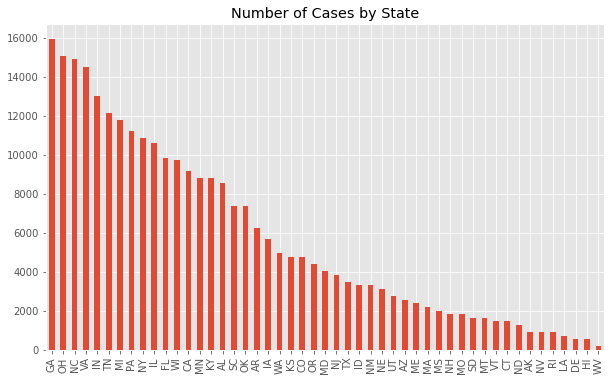

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
df['res_state'].value_counts(dropna=False).plot(kind='bar', ax=ax)
ax.set_title('Number of Cases by State');

In [43]:
df

,case_month,res_state,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,...,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,low_income_score,perc_tribal_ct,perc_rural_ct
0,2020-08,KY,GRAYSON,21085,0 - 17 years,<NA>,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,<NA>,15.0,0.000000,1.000000
1,2021-01,NC,MARTIN,37117,0 - 17 years,<NA>,<NA>,<NA>,0.0,NaN,...,Unknown,Laboratory-confirmed case,Asymptomatic,No,Unknown,No,<NA>,15.0,0.000000,1.000000
2,2021-03,VT,FRANKLIN,50011,18 to 49 years,<NA>,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes,0.0,0.000000,1.000000
3,2020-09,GA,CATOOSA,13047,0 - 17 years,Female,Unknown,Missing,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>,0.0,0.000000,0.090909
4,2021-04,PA,CLINTON,42035,0 - 17 years,Female,<NA>,<NA>,0.0,0.0,...,Yes,Laboratory-confirmed case,Symptomatic,No,No,<NA>,<NA>,7.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279995,2020-03,MD,ST. MARY'S,24037,18 to 49 years,Male,<NA>,<NA>,NaN,0.0,...,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,<NA>,<NA>,0.0,0.000000,0.352941
279996,2021-01,NY,TOMPKINS,36109,18 to 49 years,Male,Unknown,Unknown,0.0,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,<NA>,7.0,0.043478,0.304348
279997,2020-11,MD,HOWARD,24027,50 to 64 years,Male,Missing,<NA>,NaN,NaN,...,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,<NA>,0.0,0.000000,0.018182
279998,2020-11,OK,JACKSON,40065,50 to 64 years,Male,Unknown,<NA>,NaN,NaN,...,Missing,Laboratory-confirmed case,Unknown,No,Missing,<NA>,<NA>,7.0,1.000000,1.000000
